Importing Libraries

In [34]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
from scipy.stats import mode
from numpy.random import randint
from sklearn.metrics import accuracy_score, classification_report
import argparse
import imutils
import cv2
import os
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from skimage import feature

Histogram to extract color

In [2]:
# Histogram feature extraction technique
def ext_color_hist(image, bins=(8, 8, 8)):

	#defining size of image as 80*80
	image = cv2.resize(image, (80, 80)) 

	# extracting a 3D color histogram from the HSV color space 
	color_space = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist_cal = cv2.calcHist([color_space], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	
	# normalizing the histogram (open CV version 3 and above)
	cv2.normalize(hist_cal, hist_cal)
 
	# returning the flattened histogram as feature vector
	return hist_cal.flatten()

SIFT Function

In [3]:
# was trying sift but it shows patented error of open cv cv2

"""
def SIFT_calc(image):
  gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # sift = cv2.xfeatures2d.SIFT_create()
  sift = cv2.SIFT_create()
  kp = sift.detect(gray_scale,None)
  sift_image = cv2.drawKeypoints(gray_scale, kp, image)
  return sift_image.flatten()
  
"""

'\ndef SIFT_calc(image):\n  gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n  # sift = cv2.xfeatures2d.SIFT_create()\n  sift = cv2.SIFT_create()\n  kp = sift.detect(gray_scale,None)\n  sift_image = cv2.drawKeypoints(gray_scale, kp, image)\n  return sift_image.flatten()\n  \n'

HOG Function

In [4]:
# HOG feature extraction technique

def HOG_Cal(image):
  #defining size of image as 80*80
  image = cv2.resize(image, (80, 80)) 
  (hog, hog_image) = feature.hog(image, orientations=9, 
                      pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                      block_norm='L2-Hys', visualize=True, transform_sqrt=True, multichannel=True)
  # returning the flattened hog as feature vector
  return hog_image.flatten()

Kaggle

In [5]:
# importing fruit 360 dataset from kaggle
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                       3GB  2022-02-05 20:51:56            877  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries    3KB  2022-01-15 07:06:09           2869  
yasserh/wine-quality-dataset                                Wine Quality Dataset                              21KB  2022-01-15 19:15:11           2537  
sanjeetsinghnaik/top-1000-highest-grossing-movies           Top 1000 Highest Grossing Movies                 106KB  2022-01-15 16:26:14           1825  
iamsouravbanerjee/analytics-industry-salaries-20

In [6]:
! kaggle datasets download -d moltean/fruits

 99% 1.27G/1.28G [00:14<00:00, 69.9MB/s]
100% 1.28G/1.28G [00:14<00:00, 94.7MB/s]


In [7]:
!unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

Extracting images and their labels

In [8]:
# importing training folder in rootdirectory
rootdir = './fruits-360_dataset/fruits-360/Training/'

# total images taken for training
totalImages = 40000
totalDirectories = 0

# count total number of directory
for subdir, dirs, files in os.walk(rootdir):
  totalDirectories += 1

# count total number of images per directory
imagesPerDirectory = totalImages/totalDirectories
imagePaths = []
y_train = []

for subdir, dirs, files in os.walk(rootdir):
    count = 0

    # storing image path and image label from sub directory 
    for file in files:
        imagePaths.append(os.path.join(subdir, file))
        y_train.append(str(subdir).split('/')[-1])
        count += 1
        if(count >= imagesPerDirectory):
          break

In [9]:
print(imagePaths)
print(len(imagePaths))
print(y_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Feature Extraction

In [10]:
# made a feature array to store concatenated Histogram and Hog feature 
x_train = []
for imagePath in imagePaths:
  img = cv2.imread(imagePath)
  histogram_function = ext_color_hist(img, (8,8,8))
  hog_function = HOG_Cal(img)
  x_train.append(np.concatenate((histogram_function, HOG_Cal(img))))

In [11]:
x_train = np.array(x_train)
y_train = np.array(y_train)

Creating ML model

In [12]:
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.linalg.norm(p1-p2)
    return dist
 
#Function to calculate KNN
def predict_KNN(x_train, y , x_input, k):
    sortedLabels = []
     
    
    for item in x_input: 
        #Array to store all euclidean distances 
        dist = []
         
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            dist.append(distances) 
        dist = np.array(dist)
         
        #sorting the distances 
        sortedDist = np.argsort(dist)[:k]
        
        labels = y[sortedDist]
         
        #Majority voting by calculating mode
        lab = mode(labels) 
        lab = lab.mode[0]
        sortedLabels.append(lab)
        
 
    return sortedLabels

Sample Testing and Ploting

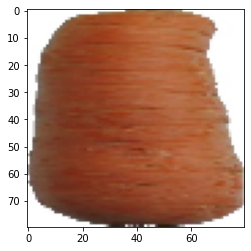

In [59]:
imagePath = "./fruits-360-original-size/fruits-360-original-size/Training/carrot_1/r0_100.jpg"

# Reading the Image
testingImage = cv2.resize(cv2.imread(imagePath), (80, 80))
plt.imshow(testingImage[:,:,::-1])

Histogram Testing and Ploting

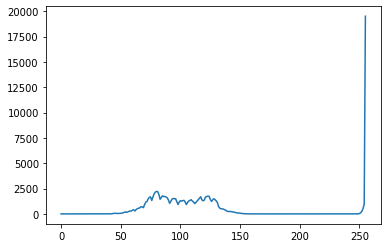

In [43]:
img = cv2.imread(imagePath,0)
  
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

HOG Testing and Ploting

In [44]:
def HOG_Plot(image):
  image = cv2.resize(image, (80, 80))
  (hog, hog_image) = feature.hog(image, orientations=9, 
                        pixels_per_cell=(10, 10), cells_per_block=(2, 2), 
                        block_norm='L2-Hys', visualize=True, transform_sqrt=True, multichannel=True)
  plt.imshow((hog_image*255)[...,::-1])

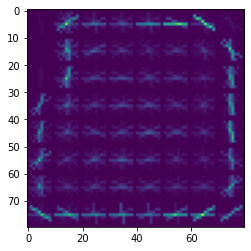

In [31]:
HOG_Plot(testingImage)

Extracting test data

In [13]:
# importing test folder in rootdirectory
rootdirTest = './fruits-360_dataset/fruits-360/Test/'

# total images taken for test
totalImagesTest = 5000
totalDirectoriesTest = 0

# count total number of directory
for subdirt, dirst, filest in os.walk(rootdirTest):
  totalDirectoriesTest += 1

# count total number of images per directory
imagesPerDirectoryTest = totalImagesTest/totalDirectoriesTest
testImagePaths = []
y_test = []

for subdirt, dirst, filest in os.walk(rootdirTest):
    count = 0

    # storing image path and image label from sub directory 
    for filet in filest:
        testImagePaths.append(os.path.join(subdirt, filet))
        y_test.append(str(subdirt).split('/')[-1])
        count += 1
        if(count >= imagesPerDirectoryTest):
          break

In [14]:

# made a feature_test array to store concatenated Histogram and Hog feature 
x_test = []
for testImagePath in testImagePaths:
  img_test = cv2.imread(testImagePath)
  x_test.append(np.concatenate((ext_color_hist(img_test), HOG_Cal(img_test))))

In [15]:
x_test = np.array(x_test)
y_test = np.array(y_test)

Training and Testing

In [16]:
y_pred = predict_KNN(x_train,y_train,x_test , 3)
#Checking the accuracy
accuracy_score(y_test, y_pred)

0.8378867014865408

In [45]:
def getMetrices(report):
  res = []
  rep = report.split('\n')[-2]
  r = rep.split()
  for i in range(len(r)):
    if(r[i].strip().replace('.', '', 1).isdigit()):
      res.append(r[i].strip())
  (precision, recall, f1_score, support) = res
  return (precision, recall, f1_score)


In [17]:
report = classification_report(y_pred, y_test)
print(report)

                     precision    recall  f1-score   support

     Apple Braeburn       0.71      0.96      0.82        28
 Apple Crimson Snow       0.89      0.67      0.76        51
     Apple Golden 1       0.74      0.74      0.74        38
     Apple Golden 2       0.84      0.91      0.88        35
     Apple Golden 3       0.95      0.90      0.92        40
 Apple Granny Smith       0.97      0.79      0.87        47
    Apple Pink Lady       0.71      0.77      0.74        35
        Apple Red 1       0.63      0.92      0.75        26
        Apple Red 2       0.76      0.88      0.82        33
        Apple Red 3       0.74      1.00      0.85        28
Apple Red Delicious       1.00      0.97      0.99        39
 Apple Red Yellow 1       0.92      0.90      0.91        39
 Apple Red Yellow 2       0.68      1.00      0.81        26
            Apricot       0.61      0.82      0.70        28
            Avocado       0.68      0.90      0.78        29
       Avocado ripe    

In [48]:
precision, recall, f1_score = getMetrices(report)
print(precision, recall, f1_score)

0.86 0.84 0.84


Plotting the graph

[0.86, 0.84, 0.84]


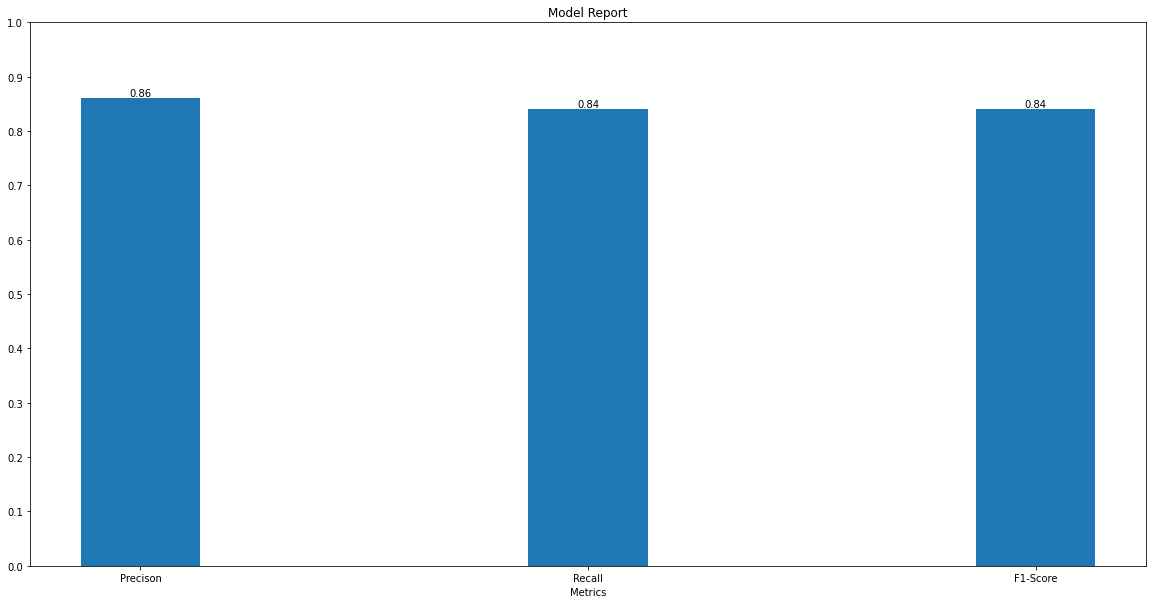

In [57]:
X = ['Precison', 'Recall', 'F1-Score']
Y= [float(precision), float(recall), float(f1_score)]
print(Y)

X_Axis = np.arange(3, 12, 3)

f = plt.figure()
f.set_figheight(10)
f.set_figwidth(20)

b1 = plt.bar(X_Axis, Y, 0.8, label = 'Custom Model', zorder=3)


for rect in b1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')


# f = plt.figure()
# plt.grid(True, zorder=0)
plt.xticks(X_Axis, X)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Metrics")
plt.title("Model Report")

plt.show()